# 4 - Perform clustering of RS time series
This notebook applies a clustering algorithm to the RS time series to identify seeding units with similair temporal trends in remote sensing variables.
This notebook uses the approach and code from:
- https://towardsdatascience.com/how-to-apply-hierarchical-clustering-to-time-series-a5fe2a7d8447

## Setup

In [20]:
# Import libraries
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sktime.distances.elastic_cython import dtw_distance
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram
from scipy.cluster.hierarchy import fcluster

## Functions

In [30]:
def hierarchical_clustering(dist_mat, method='complete'):
    
    """ Builds a linkage matrix from a clustering matrix

    Parameters
    -----------
    dist_mat : numpy array
        array of distance matrix values
    method : str
        string for linkage method

    Returns
    -----------
    z : numpy array
        array of linkage matrix values

    """
    
    if method == 'complete': 
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

## Restore pre-processed RS time series data

In [31]:
# Open the saved DF
%store -r landsat_8_time_series_rlmean
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.reset_index()

# Remove the NaN values
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.dropna()
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.reset_index()
landsat_8_time_series_rlmean

,index,SuId,date,MeanNdvi
0,23,172,2015-04-30,0.081053
1,24,172,2015-05-31,0.083062
2,25,172,2015-06-30,0.085909
3,26,172,2015-07-31,0.086815
4,27,172,2015-08-31,0.089580
...,...,...,...,...
4046,4069,2650,2021-01-31,0.166747
4047,4070,2650,2021-02-28,0.167845
4048,4071,2650,2021-03-31,0.167633
4049,4072,2650,2021-04-30,0.166740


## Reformat the dataframe for input to clustering

In [32]:
# Create temporary list to store reformatted results
data_series_list = []

# Loop over the groupby and reformat
for seeding_unit, data in landsat_8_time_series_rlmean.groupby('SuId'):

    # Create pd series for NDVI time series
    time_series_data = pd.Series(data['MeanNdvi'].values, index=data.date)
    
    time_series_data = time_series_data.rename_axis(None)
    
    # Create list to store SuId and pd series of NDVI data
    data_series = [seeding_unit, time_series_data]
    
    # Append to temporary list
    data_series_list.append(data_series)

# Convert the list to df
landsat_8_ts_reformatted = pd.DataFrame(data_series_list,
                                        columns=['SuId', 'TimeSeries'])
landsat_8_ts_reformatted.set_index('SuId')

,TimeSeries
SuId,
172,2015-04-30 0.081053 2015-05-31 0.083062 ...
816,2013-05-31 0.173901 2013-06-30 0.170463 ...
913,2013-05-31 0.194057 2013-06-30 0.188130 ...
916,2013-05-31 0.154589 2013-06-30 0.151320 ...
1265,2013-05-31 0.168357 2013-06-30 0.165219 ...
1314,2013-05-31 0.167968 2013-06-30 0.163307 ...
1319,2013-05-31 0.166748 2013-06-30 0.162585 ...
1558,2013-05-31 0.173000 2013-06-30 0.168239 ...
1588,2013-05-31 0.166703 2013-06-30 0.164403 ...


## Compute the Dynamic Time Warping (DTW) distance matrix

In [33]:
# The dtw_distance function expects series to be shaped as a (l, m) array, 
# where l=length of series, m=# dimensions           
series_list = landsat_8_ts_reformatted['TimeSeries'].values
for i in range(len(series_list)):
    length = len(series_list[i])
    series_list[i] = series_list[i].values.reshape((length, 1))

# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

## Build a linkage matrix

C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\scipy\cluster\hierarchy.py:364: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


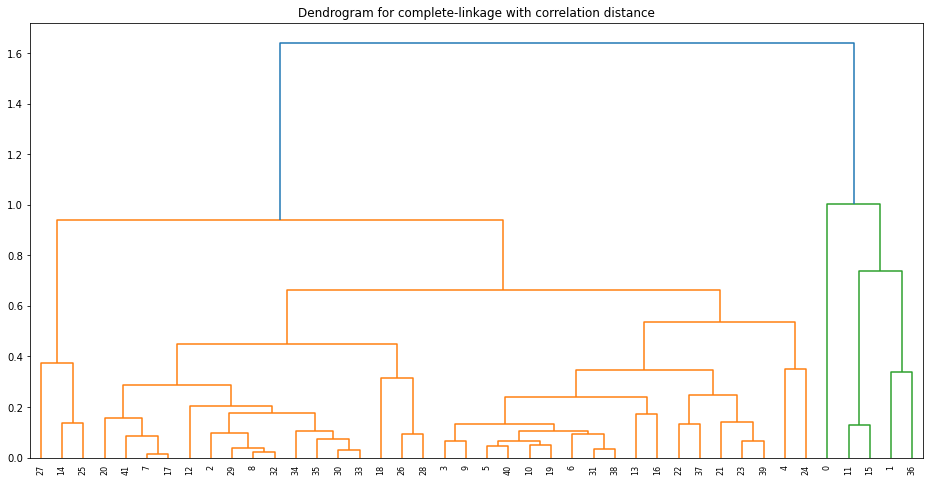

In [34]:
linkage_matrix = hierarchical_clustering(distance_matrix)

## Create the clusters

In [35]:
# Cluster using threshold of linkage_matrix
cluster_labels = fcluster(linkage_matrix, 0.3, criterion='distance')

# Convert the cluster labels to list
cluster_labels_list = cluster_labels.tolist()

# Create a list of seeding units
seeding_units = []
for seeding_unit, data in landsat_8_time_series_rlmean.groupby('SuId'):
    seeding_units.append(seeding_unit)

# Create dictionary for SuId and cluster labels
seeding_units_clusters = dict(zip(seeding_units, cluster_labels_list))

# Map the cluster label to the corresponding SuId values in the time series
landsat_8_time_series_rlmean['ClusterLabel'] = landsat_8_time_series_rlmean['SuId'].map(
    seeding_units_clusters)

#landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.reset_index()
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.set_index('date')
landsat_8_time_series_rlmean.drop(columns=['index'], inplace=True)
landsat_8_time_series_rlmean

,SuId,MeanNdvi,ClusterLabel
date,,,
2015-04-30,172,0.081053,13
2015-05-31,172,0.083062,13
2015-06-30,172,0.085909,13
2015-07-31,172,0.086815,13
2015-08-31,172,0.089580,13
...,...,...,...
2021-01-31,2650,0.166747,3
2021-02-28,2650,0.167845,3
2021-03-31,2650,0.167633,3


## Plot the clusters

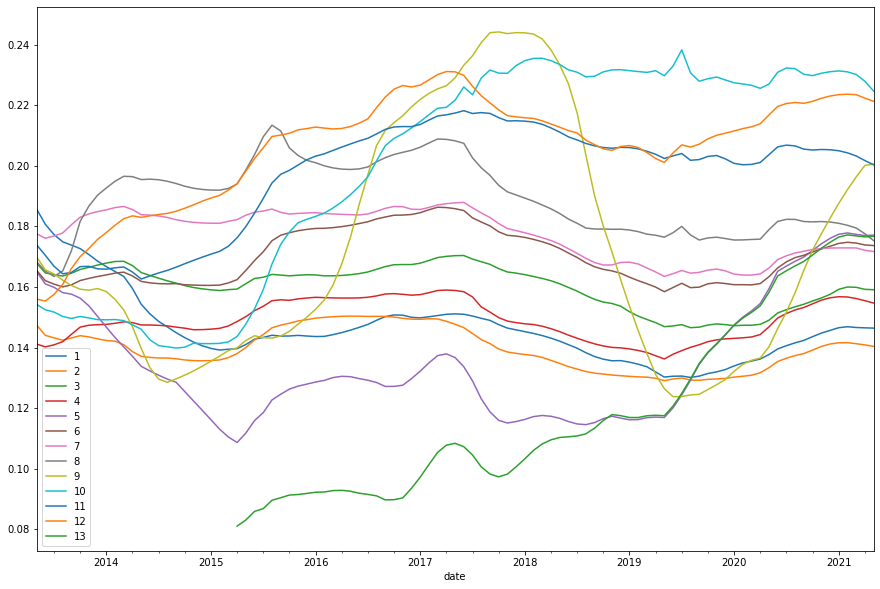

In [67]:
# Plot with time series coloured by ClusterLabel

# Setup plot
fig, ax = plt.subplots(figsize=(15, 10))

# List of unique cluster labels for legend
legend_items = []

# Loop over the ClusterLabel's
for index, data in landsat_8_time_series_rlmean.groupby('ClusterLabel'):

    # Aggregate NDVI across SuId's by grouping by date
    data.groupby('date').agg({'MeanNdvi': ['mean']}).plot(
        y='MeanNdvi', ax=ax, use_index=True)
    
    # Append the ClusterLabel to the legend
    legend_items.append(index)

ax.legend(legend_items)

## Store the output

In [10]:
#%store landsat_8_time_series_rlmean